<a href="https://colab.research.google.com/github/Imperius0299/nn_excercise/blob/main/NN_Pr%C3%A4sentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

test_labels = test_labels == 0

In [93]:
train_images.shape

(60000, 28, 28)

<function matplotlib.pyplot.show>

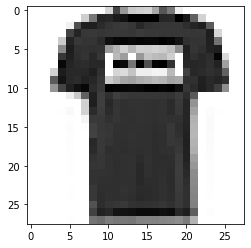

In [94]:
%matplotlib inline 
import matplotlib.pyplot as plt

plt.imshow(train_images[1], cmap="gray_r")
plt.show

In [95]:
train_labels = train_labels == 0 #hier werden die Zielwerte auf das T-Shirt festgelegt
print(train_labels)

[False  True  True ... False  True False]


In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [97]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy", tf.keras.metrics.SpecificityAtSensitivity(0.5)])

In [99]:
model.fit(train_images.reshape(60000, 784),
          train_labels,
          epochs=10,
          batch_size=1000)

Epoch 1/10
60/60 [==============================] - 1s 13ms/step - loss: 0.1289 - accuracy: 0.9531 - specificity_at_sensitivity_5: 0.9934
Epoch 2/10
60/60 [==============================] - 1s 13ms/step - loss: 0.1259 - accuracy: 0.9535 - specificity_at_sensitivity_5: 0.9939
Epoch 3/10
60/60 [==============================] - 1s 13ms/step - loss: 0.1231 - accuracy: 0.9543 - specificity_at_sensitivity_5: 0.9939
Epoch 4/10
60/60 [==============================] - 1s 14ms/step - loss: 0.1211 - accuracy: 0.9547 - specificity_at_sensitivity_5: 0.9941
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.1196 - accuracy: 0.9546 - specificity_at_sensitivity_5: 0.9942
Epoch 6/10
60/60 [==============================] - 1s 13ms/step - loss: 0.1180 - accuracy: 0.9552 - specificity_at_sensitivity_5: 0.9941
Epoch 7/10
60/60 [==============================] - 1s 13ms/step - loss: 0.1162 - accuracy: 0.9555 - specificity_at_sensitivity_5: 0.9947
Epoch 8/10
60/60 [================

[[0.83322567]]
Wahrscheinlichkeit das es sich um ein T-Shirt handelt beträgt 83.32 % 



<function matplotlib.pyplot.show>

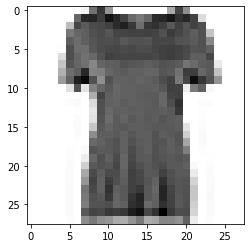

In [100]:
image_num = 10
x = model.predict(train_images[image_num].reshape(-1,784))
print(x)
print("Wahrscheinlichkeit das es sich um ein T-Shirt handelt beträgt {percent:.2f} % \n".format(percent = x[0][0] * 100))

%matplotlib inline 
import matplotlib.pyplot as plt

plt.imshow(train_images[image_num], cmap="gray_r")
plt.show

In [101]:
model.evaluate(train_images.reshape(60000, 784), train_labels)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1119 - accuracy: 0.9562 - specificity_at_sensitivity_5: 0.9949


[0.11186663061380386, 0.9562333226203918, 0.9948703646659851]

In [103]:
model.evaluate(test_images.reshape(10000,784), test_labels)#batch_size=1000)

313/313 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.9553 - specificity_at_sensitivity_5: 0.9948


[0.11845438182353973, 0.955299973487854, 0.9947777986526489]

In [ ]:
model.metrics_names